# Clean, Noisy Path

+ clean   
\\163.239.192.82\nas1_data\DB\CHiME4\data\audio\16kHz\isolated_ext 에   
F01_22GC010A_BUS.CH1.Clean.wav 이런 식으로 simu 데이터에 대한 clean 이 존재  

+ noise  
\\163.239.192.82\nas1_data\user\albert\2020_IITP_share\data\CGMM-RLS\trial_01\winL1024_gamma0.99_Ln5_MVDRon0\dt05_bus_simu 에   
winL1024_gamma0.99_Ln5_MVDRon0 와 winL1024_gamma0.99_Ln5_MVDRon1 이 있음.  
F01_22GC010A_BUS  이런식으로 1채널 파일이 존재


In [1]:
clean_root = '/home/nas/DB/CHiME4/data/audio/16kHz/isolated_ext'
noisy_root = '/home/nas/user/albert/2020_IITP_share/data/CGMM-RLS\trial_01'

# Glob

In [14]:
import os,glob

In [15]:
# Clean Test
test_clean_root = '/home/nas/user/kbh/dir_prac/clean'
test_clean_list = [x for  x in glob.glob(os.path.join(test_clean_root,'*','*.CH1.Clean.wav')) if not os.path.isdir(x)]
print(test_clean_list)

['/home/nas/user/kbh/dir_prac/clean/dt05_bus_simu/F01_22GC010A_BUS.CH1.Clean.wav', '/home/nas/user/kbh/dir_prac/clean/dt05_bus_simu/F01_22GC010X_BUS.CH1.Clean.wav', '/home/nas/user/kbh/dir_prac/clean/tr05_bus_simu/01B_01BC020A_BUS.CH1.Clean.wav', '/home/nas/user/kbh/dir_prac/clean/tr05_bus_simu/01B_01BC020D_BUS.CH1.Clean.wav', '/home/nas/user/kbh/dir_prac/clean/et05_caf_simu/F05_440C020E_CAF.CH1.Clean.wav', '/home/nas/user/kbh/dir_prac/clean/et05_caf_simu/F05_440C020F_CAF.CH1.Clean.wav']


In [16]:
# Nosiy Test
test_noisy_root = '/home/nas/user/kbh/dir_prac/noisy'
test_noisy_list = [x for  x in glob.glob(os.path.join(test_noisy_root,'*','dt*_simu','*.wav')) if not os.path.isdir(x)] \
            +[x for  x in glob.glob(os.path.join(test_noisy_root,'*','et*_simu','*.wav')) if not os.path.isdir(x)]\
            +[x for  x in glob.glob(os.path.join(test_noisy_root,'*','tr*_simu','*.wav')) if not os.path.isdir(x)]
print(test_noisy_list)

['/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/dt05_bus_simu/F01_22GC010X_BUS.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/dt05_bus_simu/F01_22GC010A_BUS.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon1/dt05_bus_simu/F01_22GC010A_BUS.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon1/dt05_bus_simu/F01_22GC010X_BUS.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/et05_caf_simu/F05_440C020F_CAF.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/et05_caf_simu/F05_440C020E_CAF.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon1/et05_caf_simu/F05_440C020E_CAF.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon1/et05_caf_simu/F05_440C020F_CAF.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/tr05_bus_simu/01B_01BC020D.wav', '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/tr05_bus_s

# Matching

### Get ID

In [17]:
for t in test_clean_list :
    x = t.split('/')
    x = x[-1]
    x = x.split('_')
    x = x[0]+'_'+x[1]
    print(x)

F01_22GC010A
F01_22GC010X
01B_01BC020A
01B_01BC020D
F05_440C020E
F05_440C020F


DEV,TEST 데이터는 F05_440C020F_CAF 이렇게 되었는데  
TRAIN 데이터는 01B_01BC020A.wav 이렇게 되었다. 

In [18]:
for t in test_noisy_list :
    x = t.split('/')
    x = x[-1]
    x = x.split('_')
    if len(x) > 2 :
        x = x[0]+'_'+x[1]
    else :
        x = x[0] + '_'+ x[1].split('.')[0]
    print(x)

F01_22GC010X
F01_22GC010A
F01_22GC010A
F01_22GC010X
F05_440C020F
F05_440C020E
F05_440C020E
F05_440C020F
01B_01BC020D
01B_01BC020A
01B_01BC020A
01B_01BC020D


## MATCHING DB

In [19]:
clean_dict={}
for t in test_clean_list :
    x = t.split('/')
    x = x[-1]
    x = x.split('_')
    x = x[0]+'_'+x[1]
    clean_dict[x] = t
print(clean_dict)

for t in test_noisy_list :
    x = t.split('/')
    x = x[-1]
    x = x.split('_')
    if len(x) > 2 :
        y = x[2].split('.')
        x = x[0]+'_'+x[1]
        print(x+'_'+y[0])
    else :
        x = x[0] + '_'+ x[1].split('.')[0]
    print( t+' | '+ clean_dict[x])

{'F01_22GC010A': '/home/nas/user/kbh/dir_prac/clean/dt05_bus_simu/F01_22GC010A_BUS.CH1.Clean.wav', 'F01_22GC010X': '/home/nas/user/kbh/dir_prac/clean/dt05_bus_simu/F01_22GC010X_BUS.CH1.Clean.wav', '01B_01BC020A': '/home/nas/user/kbh/dir_prac/clean/tr05_bus_simu/01B_01BC020A_BUS.CH1.Clean.wav', '01B_01BC020D': '/home/nas/user/kbh/dir_prac/clean/tr05_bus_simu/01B_01BC020D_BUS.CH1.Clean.wav', 'F05_440C020E': '/home/nas/user/kbh/dir_prac/clean/et05_caf_simu/F05_440C020E_CAF.CH1.Clean.wav', 'F05_440C020F': '/home/nas/user/kbh/dir_prac/clean/et05_caf_simu/F05_440C020F_CAF.CH1.Clean.wav'}
F01_22GC010X_BUS
/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/dt05_bus_simu/F01_22GC010X_BUS.wav | /home/nas/user/kbh/dir_prac/clean/dt05_bus_simu/F01_22GC010X_BUS.CH1.Clean.wav
F01_22GC010A_BUS
/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/dt05_bus_simu/F01_22GC010A_BUS.wav | /home/nas/user/kbh/dir_prac/clean/dt05_bus_simu/F01_22GC010A_BUS.CH1.Clean.wav
F01_22GC010A_BU

# Sync

CGMM 수행하면서 6채널이 1채널이 되고, STFT로 인해 딜레이가 발생한다. 싱크를 맞춰야함

In [8]:
from SyncWav import sync_wav
import torchaudio
import torch
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

a = '/home/nas/user/kbh/dir_prac/clean/dt05_bus_simu/F01_22GC010A_BUS.CH1.Clean.wav'
t = '/home/nas/user/kbh/dir_prac/noisy/winL1024_gamma0.99_Ln5_MVDRon0/dt05_bus_simu/F01_22GC010A_BUS.wav'

In [2]:
a_wav,_ = torchaudio.load(a)
t_wav,_ = torchaudio.load(t)

torch.Size([1, 78333])

(1, 78333)

numpy.ndarray

numpy.ndarray

(1, 78333)

(1, 78333)

(77565,)

(77565,)

torch.Size([1, 77565])

torch.Size([1, 77565])

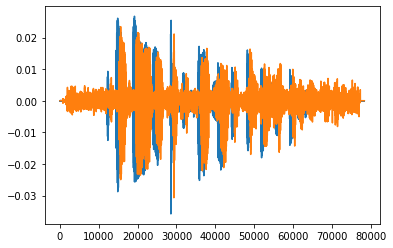

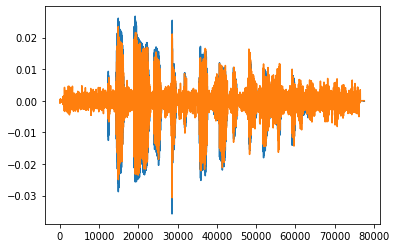

In [9]:
display((a_wav.shape))
a_np = a_wav.numpy()
t_np = t_wav.numpy()

a_np = normalize(a_np)
t_np = normalize(t_np)

display(a_np.shape)
plt.figure(0)
plt.plot(a_np[0,:])
plt.plot(t_np[0,:])

display(type(a_np))
display(type(t_np))
display(a_np.shape)
display(t_np.shape)
a_np,t_np = sync_wav(a_np,t_np)

display(a_np.shape)
display(t_np.shape)

plt.figure(1)
plt.plot(a_np)
plt.plot(t_np)

a_ts = torch.from_numpy(a_np)
t_ts = torch.from_numpy(t_np)

a_ts=a_ts.unsqueeze(0)
t_ts=t_ts.unsqueeze(0)

display(a_ts.shape)
display(t_ts.shape)

# Gen Pickle

# Test